              company  year     records   organization_type            method
0     1177 Care Guide  2020  2700000.00  medical/healthcare       third-party
1            1to1help  2020   300000.00  medical/healthcare  misconfiguration
2                3fun  2020  1500000.00                 app  misconfiguration
3          Adobe Inc.  2020  7500000.00                tech  misconfiguration
4  AgusiQ-Torrents.pl  2020    90478.00                 web           hacking
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            1131 non-null   object
 1   year               1131 non-null   int64 
 2   records            1131 non-null   object
 3   organization_type  1131 non-null   object
 4   method             1131 non-null   object
dtypes: int64(1), object(4)
memory usage: 44.3+ KB
None
company              0
year              

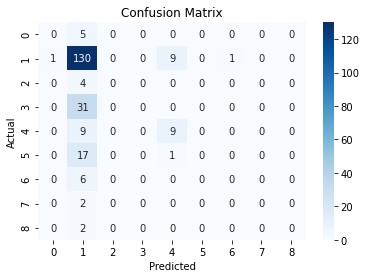

Classification report and confusion matrix have been saved to /Users/Joe/Downloads/DATASCIENCERPOJECT.


In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "/Users/Joe/Downloads/processed_data.csv"  # Adjust path if necessary
data = pd.read_csv(file_path)

# Display the first few rows and info to inspect the data
print(data.head())
print(data.info())
print(data.isnull().sum())  # Check for missing values

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns except for the target
if 'method' in categorical_columns:
    categorical_columns = categorical_columns.drop('method')

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define features and target
X = data.drop("method", axis=1)
y = data["method"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model with class weights
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model with zero_division=0
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------
# Export Classification Report and Confusion Matrix to CSV in specified folder
# ----------------------------

# Classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()  # Convert to DataFrame for easy export

# Save classification report to the specified folder
report_df.to_csv("/Users/Joe/Downloads/DATASCIENCERPOJECT/classification_report.csv", index=True)

# Convert confusion matrix to DataFrame and save to the specified folder
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f"Actual_{i}" for i in range(conf_matrix.shape[0])],
                              columns=[f"Predicted_{i}" for i in range(conf_matrix.shape[1])])
conf_matrix_df.to_csv("/Users/Joe/Downloads/DATASCIENCERPOJECT/confusion_matrix.csv", index=True)

print("Classification report and confusion matrix have been saved to /Users/Joe/Downloads/DATASCIENCERPOJECT.")
